<a href="https://colab.research.google.com/github/anushree1125/DS_ML-widpython/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Reg no: GO_STP_3122***

***Task-8***

**Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python**

Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

Prepare a prediction model for profit of 50_Startups data in Python

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
df=pd.read_csv('/content/50_Startups.csv')
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.shape

(50, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [14]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [15]:
df.State.value_counts(normalize=True)

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64

In [16]:
df.State.value_counts(normalize=False)

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [17]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [18]:
x=df.drop(['Profit','State'],axis=1)
y=df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [40]:
print(y.head())
print(x.head())

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64
   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [31]:
lm =LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred_train=lm.predict(x_train)  #actual y train
y_pred_test=lm.predict(x_test)

In [33]:
df=pd.DataFrame(y_pred_test,y_test)
df.head()

,0
Profit,
141585.52,128649.377664
81005.76,85309.283491
149759.96,155657.649789
42559.73,45362.778728
97483.56,96081.094803


In [34]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
print(mse)

93171915.49920285


In [36]:
from sklearn.metrics import r2_score
print("accuracy is: ",r2_score(y_test,y_pred_test))

accuracy is:  0.946980087531592


**Visualisation**

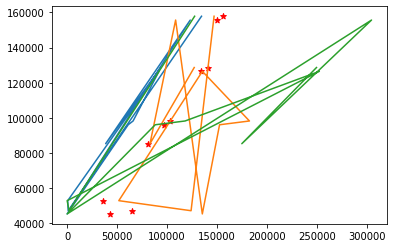

In [39]:
plt.scatter(y_test,y_pred_test,c='red',marker='*')
plt.plot(x_test,lm.predict(x_test))
plt.show()